# Setting Up - Install Packages in the Workspace
Before you move on to the project instruction, follow the cells below to ensure you have the necessary packages installed. 
The cells below will also educate you on installing newer pinned packages, should you need them in the future. 

In [1]:
# Step 1. Update the PATH env var. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/home/student/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.10/site-packages"
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [2]:
# Check the version of any specific package
!python -m pip freeze | grep numpy

numpy @ file:///work/mkl/numpy_and_numpy_base_1682953417311/work


# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
!pip -q install .

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [ ]:
# Restart the Kernel. 
# If you skip this step, your notebook may not be able to import the packages well. 


In [1]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

Found path: /data/Banana_Linux_NoVis/Banana.x86_64
Mono path[0] = '/data/Banana_Linux_NoVis/Banana_Data/Managed'
Mono config path = '/data/Banana_Linux_NoVis/Banana_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [4]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [5]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [6]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from dqn_agent import AgentObject

In [7]:
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

In [8]:
my_agent = AgentObject(state_size, action_size, data_seed=0)

In [9]:
def dqn(data_n_episodes=2000, data_eps_start=1.0, data_eps_end=0.01, data_eps_decay=0.995):
    data_scores_window = deque(maxlen=100)
    data_eps = data_eps_start
    data_scores = []
    for i_episode in range(1, data_n_episodes+1):
        data_score = 0
        env_info = env.reset(train_mode=True)[brain_name]
        data_state = env_info.vector_observations[0] 
        while True:
            data_action = my_agent.act(data_state, data_eps)
            
            env_info = env.step(data_action)[brain_name]
            data_reward = env_info.rewards[0]
            data_done = env_info.local_done[0]
            data_next_state = env_info.vector_observations[0]  
            
            my_agent.step(data_state, data_action, data_reward, data_next_state, data_done)
            data_score += data_reward
            data_state = data_next_state
            if data_done:
                break 
        data_scores_window.append(data_score)
        data_eps = max(data_eps_end, data_eps_decay*data_eps)
        data_scores.append(data_score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(data_scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(data_scores_window)))
        if np.mean(data_scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(data_scores_window)))
            torch.save(my_agent.data_qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return data_scores

In [10]:
scores = dqn()

Episode 100	Average Score: 0.90
Episode 200	Average Score: 3.85
Episode 300	Average Score: 7.21
Episode 400	Average Score: 10.05
Episode 500	Average Score: 11.94
Episode 576	Average Score: 13.04
Environment solved in 476 episodes!	Average Score: 13.04


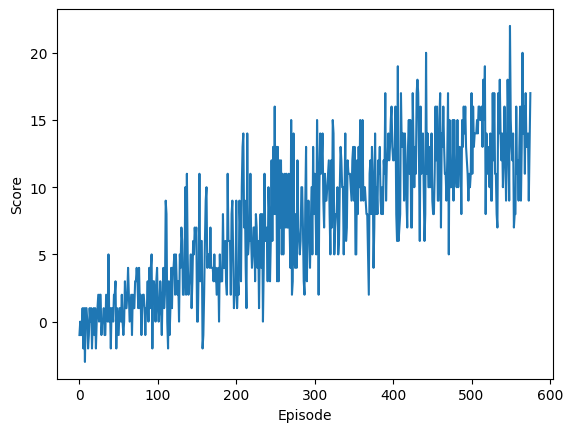

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()